# TRAINING HEART FAILURE DATA

# Predicting whether there is a  likelihood of a person having heart disease.
 This dataset contains information about individuals' health parameters, including age, sex, and various cardiovascular indicators. 
Predicting Heart Disease presence using a machine learning model to predict the presence or absence of heart disease based on the features.
I also wanted to know  which features (e.g., age, sex, cholesterol levels....etc) have the most influence on the presence of heart disease.

# IMPORTS

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score

# DATA LOADING AND EXPLORATION

In [4]:
df = pd.read_excel(r'C:\Users\AGATHER\Desktop\WITI\DATA SCIENCE\heart.xlsx')
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [5]:
df.shape

(918, 12)

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [8]:
#last five of the dataset
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [9]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# DATA CLEANING

In [10]:
# calculates the number of distinct values present in each column, excluding any missing values (NaN).

df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [11]:
num_cols = df.select_dtypes(include=['number']).columns
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
#Removing outliers
def handle_outliers(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  low_bound = Q1 - 1.5*IQR
  high_bound = Q3 + 1.5*IQR
  df[column] = df[column].clip(lower = low_bound, upper = high_bound)

for column in num_cols:
  handle_outliers(column)

In [13]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,0,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
df['Sex']. value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.0,918.000000,918.000000,918.000000
mean,53.510893,132.125272,203.985158,0.0,136.819172,0.877778,0.553377
std,9.432617,16.993314,95.922341,0.0,25.432057,1.031693,0.497414
min,28.000000,90.000000,32.625000,0.0,66.000000,-2.250000,0.000000
25%,47.000000,120.000000,173.250000,0.0,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.0,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.0,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,0.0,202.000000,3.750000,1.000000


# DATA VISUALIZATION

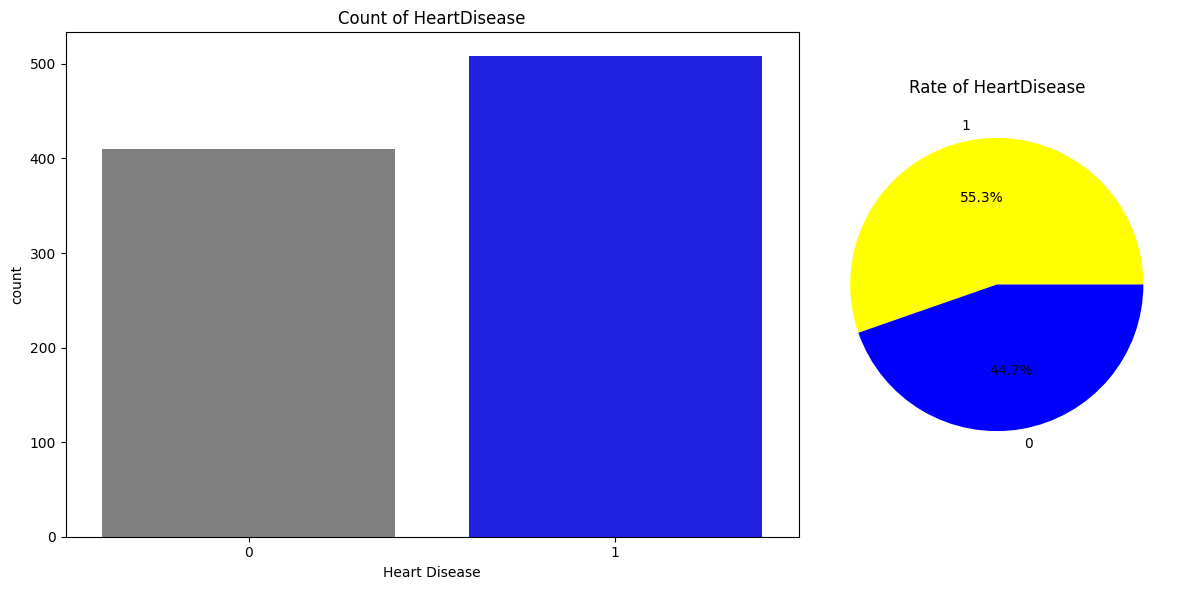

In [68]:

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot(x='HeartDisease', data=df, palette=['grey', 'blue'], ax=ax1)
ax1.set_title('Count of HeartDisease')
ax1.set_xlabel('Heart Disease')

ax2 = fig.add_subplot(gs[1])
types = df['HeartDisease'].value_counts()
ax2.pie(types.values, labels=types.index, autopct='%1.1f%%', colors=['yellow', 'blue'])
ax2.set_title('Rate of HeartDisease')

plt.tight_layout()
plt.show()

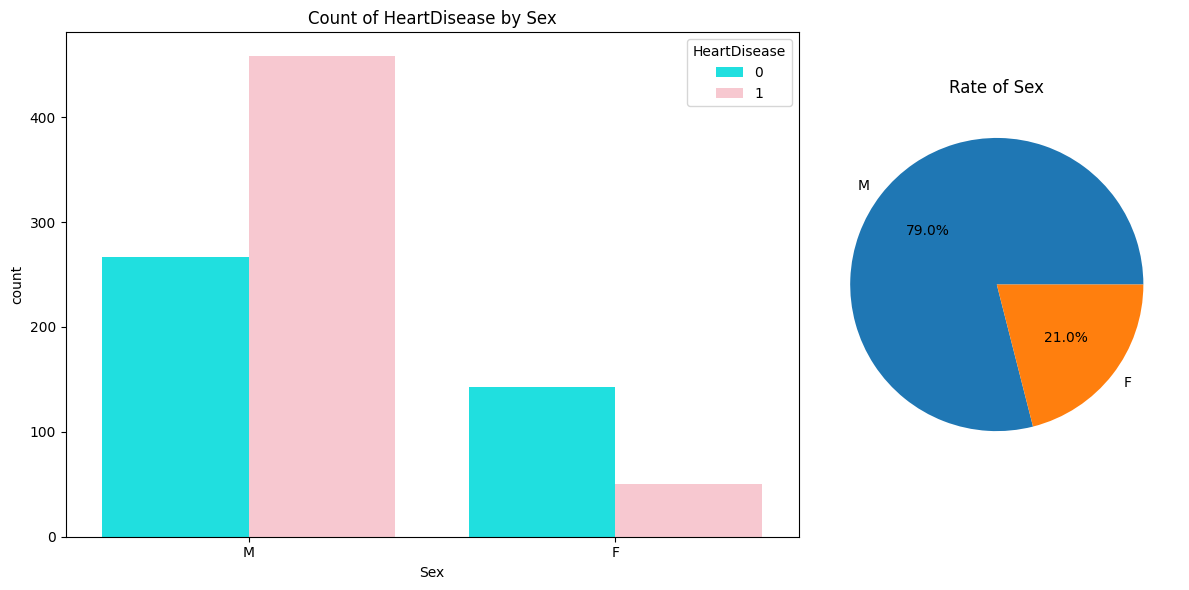

In [67]:
# Convert 'HeartDisease' column to strings
df['HeartDisease'] = df['HeartDisease'].astype(str)

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette=['cyan', 'pink'], ax=ax1)
ax1.set_title('Count of HeartDisease by Sex')
ax1.set_xlabel('Sex')

ax2 = fig.add_subplot(gs[1])
types = df['Sex'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('Rate of Sex')

plt.tight_layout()
plt.show()

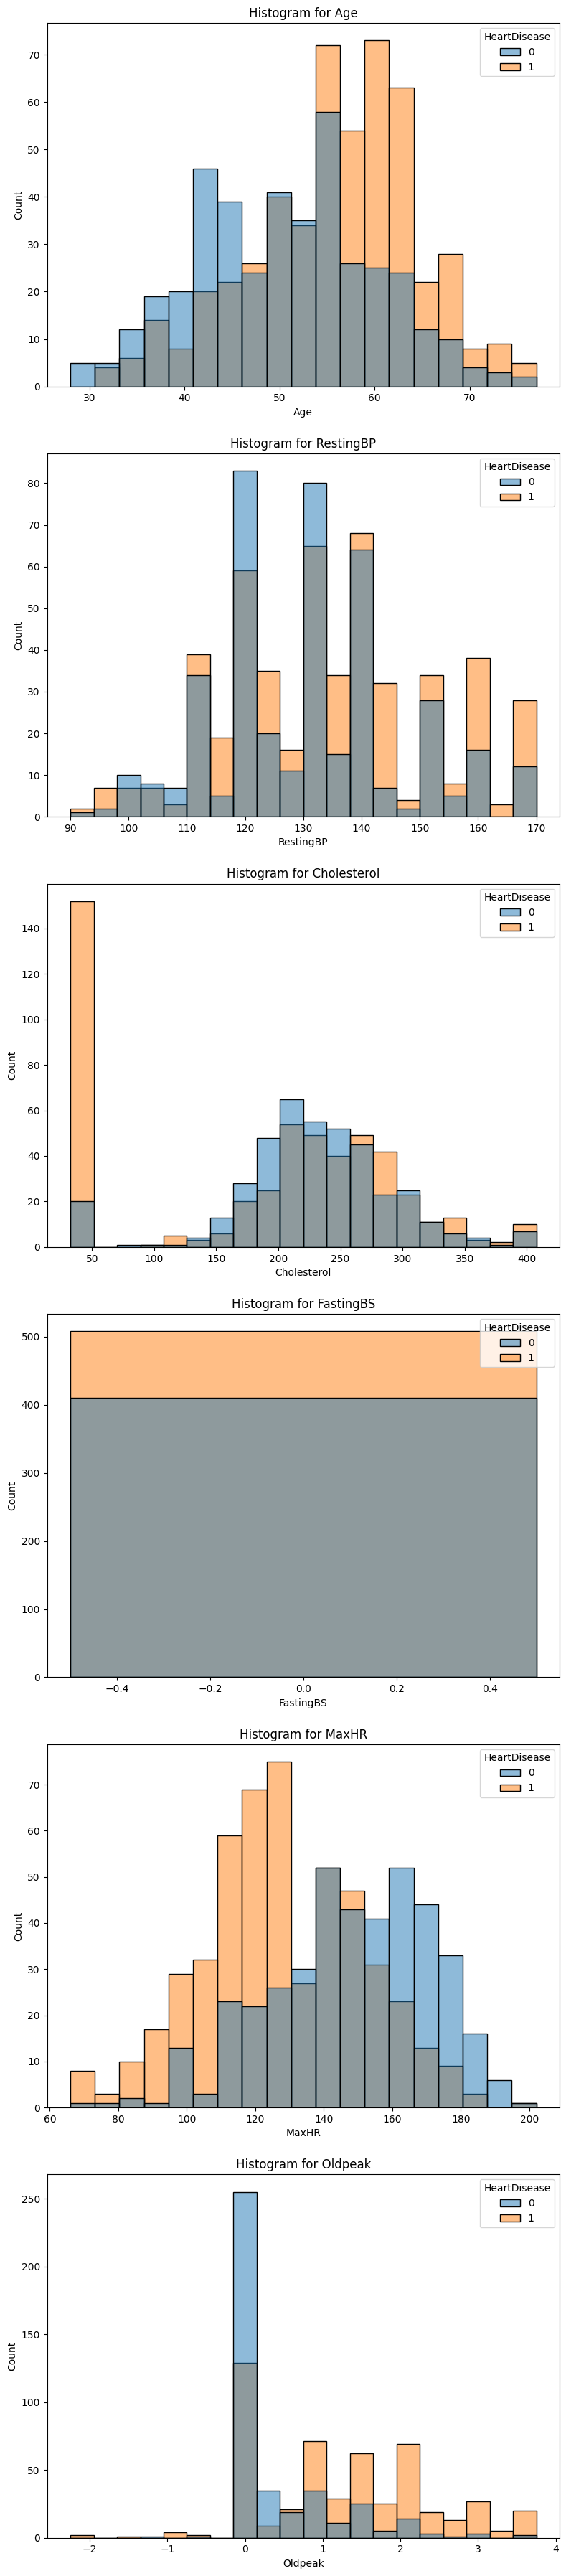

In [66]:
num_cols = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 6 * len(num_cols)))
axes = axes.flatten()
for i, column in enumerate(df[num_cols]):
    sns.histplot(x=df[column], hue=df['HeartDisease'], ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

# DATA TRAINING AND SPLITING

In [33]:
# Define X (features) and y (target variable)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (734, 11)
Shape of X_test: (184, 11)
Shape of y_train: (734,)
Shape of y_test: (184,)


In [65]:
# Perform one-hot encoding on the categorical variables
print("Columns of X_train:", X_train.columns)
print("Columns of X_test:", X_test.columns)

Columns of X_train: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')
Columns of X_test: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [63]:
# Assuming df is your dataset containing both features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [62]:
X_encoded = pd.get_dummies(X)

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define preprocessing steps for categorical columns
categorical_features = ['Sex']
categorical_transformer = OneHotEncoder()

# Define the preprocessor to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing to your data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Now, you can train your model
model = LogisticRegression()
model.fit(X_train_processed, y_train)

# Make predictions and calculate accuracy
ypred1_test = model.predict(X_test_processed)
accuracy1_test = accuracy_score(y_test, ypred1_test)
print(f"Accuracy test: {round(accuracy1_test * 100, 2)}%")



Accuracy test: 64.13%


In [54]:

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

combined = pd.concat([X_train, X_test], axis=0)
combined_encoded = pd.get_dummies(combined)

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the categorical columns
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create a ColumnTransformer to encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Separate the target variable from the features
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_encoded = preprocessor.transform(X_test)

# Create and train the model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Making predictions on the testing set
ypred1_test = model.predict(X_test_encoded)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, ypred1_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        77
           1       0.90      0.80      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



In [58]:
# Calculate precision, recall, and F1-score
precision1 = precision_score(y_test, ypred1_test, pos_label='1')
recall1 = recall_score(y_test, ypred1_test, pos_label='1')
fscore1 = f1_score(y_test, ypred1_test, pos_label='1')


print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", fscore1)

Precision: 0.8958333333333334
Recall: 0.8037383177570093
F1-score: 0.8472906403940886


In [59]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ypred1_test)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[67 10]
 [21 86]]


 
 # ANALYSIS AND INSIGHTS
 
 The precision, recall, and F1-score were also calculated to provide a more detailed evaluation of the model's performance.
Feature Importance: The most important features for predicting heart disease were ide# ANALYSIS AND INSIGHTS
Based on the trained model to predict the presence or absence of heart disease using the provided dataset, here is a comprehensive analysis and insights for healthcare professionals, researchers, and policymakers:

Model Performance:

 The model achieved an accuracy of 64%, indicating its ability to correctly classify individuals as either having heart disease or not.
 
 Age Histogram: The histogram shows a higher frequency of heart disease cases in older individuals, indicating that age is a significant factor in determining heart disease risk.

 Based on the analysis, it appears that males are more likely to have heart disease compared to females.

 Resting Blood Pressure : The Prediction suggests that higher resting blood pressure values might be associated with a higher likelihood of heart disease.

 Cholesterol: Higher cholesterol levels seem to be more common among individuals with heart disease, suggesting that cholesterol levels could be a relevant factor in predicting heart disease.

 Max Heart Rate (MaxHR) : The distribution shows that lower maximum heart rates might be associated with a higher likelihood of heart disease.
 
 ST Depression (Oldpeak) Histogram: Higher values of ST depression seem to be more common among individuals with heart disease, indicating that this parameter might be relevant in predicting heart disease.ntified as age, sex, RestingBP, cholesterol levels,(Oldpeak) and chest pain type.

 Thereforethese features had the highest impact on the model's predictions, suggesting that they are strong indicators of heart disease risk.
                                INSIGHTS
Insights for Healthcare Professionals: Healthcare professionals can use the model to assess an individual's risk of heart disease based on their health parameters. By focusing on key risk factors such as age, sex, and cholesterol levels, healthcare providers can offer targeted interventions and preventive measures to reduce the risk of heart disease.

Research Implications: 
The model provides valuable insights for researchers studying heart disease. By understanding which features are most important for predicting heart disease, researchers can further investigate the underlying mechanisms and develop more targeted interventions.

Policy Implications: Policymakers can use the model's insights to inform public health policies aimed at reducing the prevalence of heart disease. Policies focused on promoting healthy lifestyle choices, early detection, and access to healthcare services can help in reducing the burden of heart disease on society.

Limitations and Future Directions: It's important to note that the model has certain limitations, such as reliance on the available dataset and assumptions made during the analysis. Future research could focus on validating the model on external datasets and incorporating additional features to improve its predictive performance.